# Predicting length of stay (LOS) and categorization for healthcare management

 ## Importing Files

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import seaborn as sns
import requests
import numpy as np
import math
import warnings            
warnings.filterwarnings("ignore") 

In [8]:
hospital_data_df=pd.read_csv("C:/Users/shaml/Downloads/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015 (1).csv")

In [9]:
hospital_data_df

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,104,F,Black/African American,Not Span/Hispanic,...,Extreme,Surgical,Medicare,Medicare,Medicaid,0,N,Y,115933.16,98318.05
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,104,F,Other Race,Spanish/Hispanic,...,Minor,Medical,Medicaid,Medicaid,NaN,0,N,Y,7911.22,8583.86
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,104,M,Other Race,Unknown,...,Moderate,Medical,Medicare,Medicaid,NaN,0,N,Y,12117.18,12509.02
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,104,M,Other Race,Not Span/Hispanic,...,Minor,Medical,Medicaid,Medicaid,NaN,0,N,Y,9821.79,9757.44


# **Data cleaning**

In [10]:
# Check for missing (NA) values in the dataset
na_values = hospital_data_df.isna().sum()

na_values



Health Service Area                      2329
Hospital County                          2329
Operating Certificate Number             2329
Facility Id                              2329
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                     15920
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description               

In [11]:
# drop columns which has huge na values
hospital_data_df = hospital_data_df.drop(['Payment Typology 2','Payment Typology 3','Zip Code - 3 digits'], axis=1)
hospital_data_df

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,1,Minor,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2,...,1,Minor,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30,...,4,Extreme,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2,...,1,Minor,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2,...,2,Moderate,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44


In [12]:
hospital_data_df.isna().sum()

Health Service Area                    2329
Hospital County                        2329
Operating Certificate Number           2329
Facility Id                            2329
Facility Name                             0
Age Group                                 0
Gender                                    0
Race                                      0
Ethnicity                                 0
Length of Stay                            0
Type of Admission                         0
Patient Disposition                       0
Discharge Year                            0
CCS Diagnosis Code                        0
CCS Diagnosis Description                 0
CCS Procedure Code                        0
CCS Procedure Description                 0
APR DRG Code                              0
APR DRG Description                       0
APR MDC Code                              0
APR MDC Description                       0
APR Severity of Illness Code              0
APR Severity of Illness Descript

In [13]:
hospital_data_df = hospital_data_df.dropna()
hospital_data_df


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4,...,1,Minor,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2,...,1,Minor,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30,...,4,Extreme,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2,...,1,Minor,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2,...,2,Moderate,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44


In [14]:
hospital_data_df.isna().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg

In [15]:
# Check for duplicate rows in the dataset
duplicate_rows = hospital_data_df.duplicated().sum()

duplicate_rows

4234

In [11]:
# Drop duplicate rows
hospital_data_df = hospital_data_df.drop_duplicates()


In [46]:
hospital_data_df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity 

In [12]:
hospital_data_df_cleaned=hospital_data_df

In [13]:
# Identify numerical and categorical columns
numerical_cols = hospital_data_df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = hospital_data_df_cleaned.select_dtypes(include=['object']).columns.tolist()

(numerical_cols, categorical_cols)



(['Operating Certificate Number',
  'Facility Id',
  'Discharge Year',
  'CCS Diagnosis Code',
  'CCS Procedure Code',
  'APR DRG Code',
  'APR MDC Code',
  'APR Severity of Illness Code',
  'Birth Weight',
  'Total Charges',
  'Total Costs'],
 ['Health Service Area',
  'Hospital County',
  'Facility Name',
  'Age Group',
  'Gender',
  'Race',
  'Ethnicity',
  'Length of Stay',
  'Type of Admission',
  'Patient Disposition',
  'CCS Diagnosis Description',
  'CCS Procedure Description',
  'APR DRG Description',
  'APR MDC Description',
  'APR Severity of Illness Description',
  'APR Risk of Mortality',
  'APR Medical Surgical Description',
  'Payment Typology 1',
  'Abortion Edit Indicator',
  'Emergency Department Indicator'])

In [14]:
# Check for duplicate rows in the dataset
duplicate_rows = hospital_data_df_cleaned.duplicated().sum()
duplicate_rows

0

In [15]:
# Calculating the number of rows and columns in the DataFrame
rows, columns = hospital_data_df_cleaned.shape
rows, columns


(1041939, 31)

# Feature Engineering

In [16]:
# Convert '120+' to 120 and other possible non-numeric strings to NaN
hospital_data_df_cleaned['Length of Stay'] = hospital_data_df_cleaned['Length of Stay'].replace('120+', 120)
hospital_data_df_cleaned['Length of Stay'] = pd.to_numeric(hospital_data_df_cleaned['Length of Stay'], errors='coerce')
hospital_data_df_cleaned

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,1,Minor,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2.0,...,2,Moderate,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2.0,...,1,Minor,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30.0,...,4,Extreme,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2.0,...,1,Minor,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3.0,...,2,Moderate,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2.0,...,2,Moderate,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44


In [17]:
hospital_data_df_cleaned.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                         float64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity 

In [18]:
hospital_data_df_cleaned.isna().sum()
#Drop rows with NaN in 'Length of Stay' if any resulted from the conversion
hospital_data_df_cleaned = hospital_data_df_cleaned.dropna(subset=['Length of Stay'])
hospital_data_df_cleaned.isna().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surg

In [19]:

# Assuming hospital_data_df_cleaned is DataFrame and 'Length of Stay' is column of interest

# Define the edges of your bins
bins = [0, 7, 30, 60, 90, 120]

# Define the labels for your bins
labels = ['Short Stay', 'Medium Stay', 'Long Stay', 'Very Long Stay', 'Extended Stay']

# Create a new column with the binned data
hospital_data_df_cleaned['Stay Category'] = pd.cut(hospital_data_df_cleaned['Length of Stay'], bins=bins, labels=labels, include_lowest=True, right=False)

# Display the first few rows to verify the operation
hospital_data_df_cleaned

# Now, 'Stay Category' will be target variable for classification


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Stay Category
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Moderate,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42,Short Stay
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Moderate,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78,Short Stay
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56,Short Stay
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2.0,...,Moderate,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25,Short Stay
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2.0,...,Minor,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89,Short Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30.0,...,Extreme,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05,Long Stay
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2.0,...,Minor,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86,Short Stay
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3.0,...,Moderate,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02,Short Stay
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2.0,...,Moderate,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44,Short Stay


In [20]:


# Specify the order of the categories
order = [['Short Stay', 'Medium Stay', 'Long Stay', 'Very Long Stay', 'Extended Stay']]

# Initialize the encoder
encoder = OrdinalEncoder(categories=order)

# Fit and transform the data (assuming your column is named 'Stay Category')
hospital_data_df_cleaned['Stay_cat_ordinal_data'] = encoder.fit_transform(hospital_data_df_cleaned[['Stay Category']])

hospital_data_df_cleaned


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Stay Category,Stay_cat_ordinal_data
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42,Short Stay,0.0
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78,Short Stay,0.0
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56,Short Stay,0.0
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2.0,...,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25,Short Stay,0.0
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2.0,...,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89,Short Stay,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30.0,...,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05,Long Stay,2.0
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86,Short Stay,0.0
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3.0,...,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02,Short Stay,0.0
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44,Short Stay,0.0


In [21]:
hospital_data_df_cleaned.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Stay Category', 'Stay_cat_ordinal_data'],
      dtype='object')

# Exploratory data analysis (EDA)

In [22]:


# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Summary Statistics for Numerical Variables
summary_stats = hospital_data_df_cleaned[numerical_cols].describe()
summary_stats

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,1.041071e+06,1.041071e+06,1041071.0,1.041071e+06,1.041071e+06,1.041071e+06,1.041071e+06,1.041071e+06,1.041071e+06,1.041071e+06,1.041071e+06
mean,3.506550e+06,6.833476e+02,2015.0,1.965605e+02,9.450152e+01,4.177218e+02,1.043145e+01,2.043893e+00,2.848965e+02,3.285437e+04,1.225809e+04
std,2.191892e+06,6.847722e+02,0.0,1.678722e+02,8.768990e+01,2.442161e+02,6.018058e+00,8.941330e-01,9.367285e+02,5.870054e+04,1.865405e+04
min,1.010000e+05,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1.401014e+06,2.160000e+02,2015.0,1.080000e+02,0.000000e+00,1.990000e+02,5.000000e+00,1.000000e+00,0.000000e+00,9.204495e+03,3.896535e+03
50%,3.301007e+06,6.350000e+02,2015.0,1.570000e+02,8.400000e+01,3.830000e+02,9.000000e+00,2.000000e+00,0.000000e+00,1.816995e+04,7.217960e+03
75%,5.901000e+06,1.045000e+03,2015.0,2.180000e+02,1.680000e+02,6.400000e+02,1.500000e+01,3.000000e+00,0.000000e+00,3.569216e+04,1.367509e+04
max,7.002054e+06,9.431000e+03,2015.0,9.170000e+02,9.990000e+02,9.520000e+02,2.500000e+01,4.000000e+00,8.600000e+03,4.281817e+06,1.076434e+06


## 2. **Correlation Analysis**

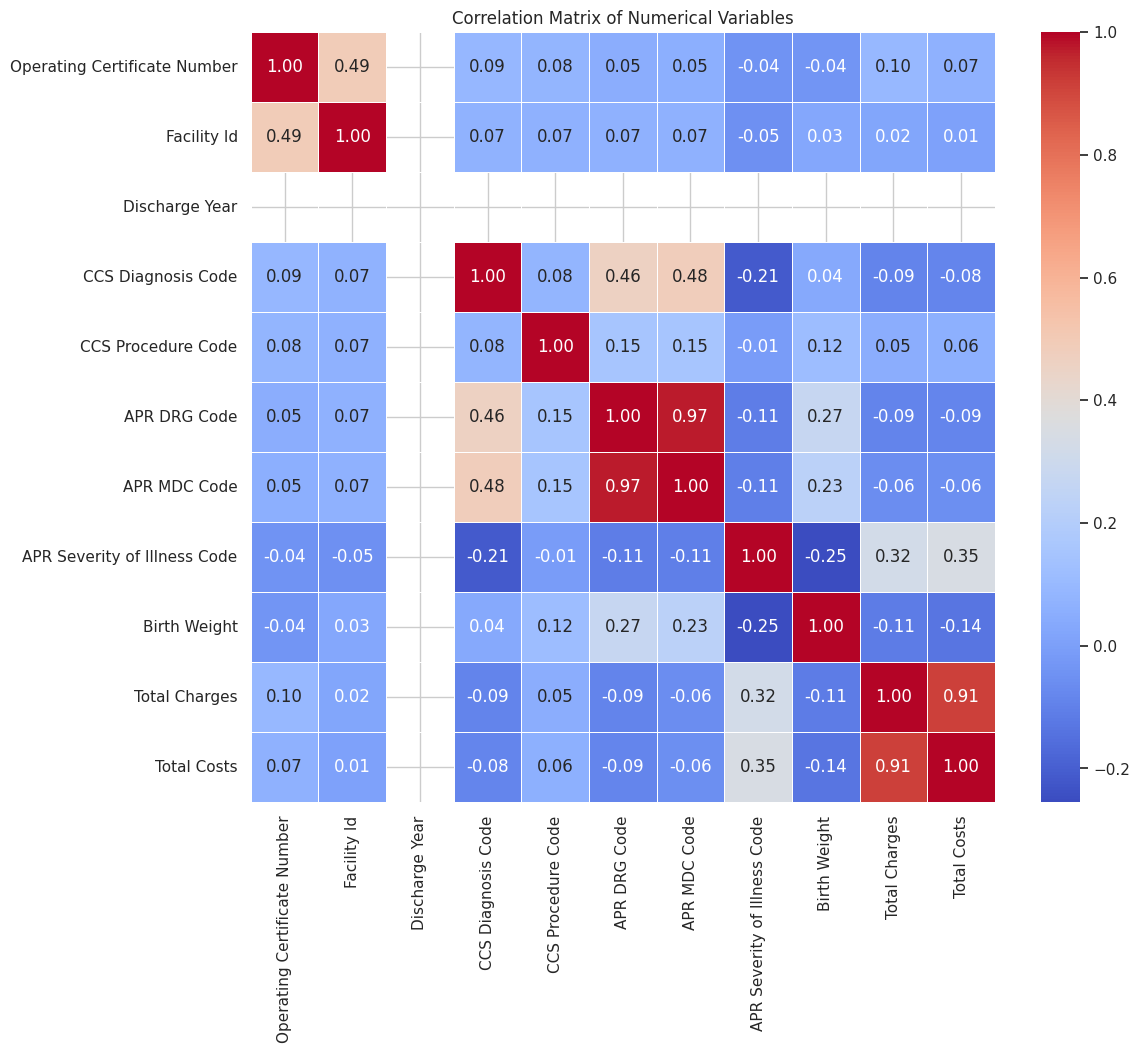

,Operating Certificate Number,Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
Operating Certificate Number,1.000000,0.491215,NaN,0.092202,0.081746,0.050273,0.054161,-0.039423,-0.035263,0.095802,0.066432
Facility Id,0.491215,1.000000,NaN,0.070508,0.065951,0.065753,0.066576,-0.052733,0.026921,0.022585,0.009165
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.092202,0.070508,NaN,1.000000,0.079223,0.460820,0.483054,-0.211230,0.038642,-0.089714,-0.084481
CCS Procedure Code,0.081746,0.065951,NaN,0.079223,1.000000,0.154621,0.154169,-0.010112,0.117200,0.049411,0.059651
APR DRG Code,0.050273,0.065753,NaN,0.460820,0.154621,1.000000,0.971232,-0.111392,0.271299,-0.090754,-0.086334
APR MDC Code,0.054161,0.066576,NaN,0.483054,0.154169,0.971232,1.000000,-0.106498,0.228512,-0.063578,-0.055421
APR Severity of Illness Code,-0.039423,-0.052733,NaN,-0.211230,-0.010112,-0.111392,-0.106498,1.000000,-0.254906,0.321227,0.345478
Birth Weight,-0.035263,0.026921,NaN,0.038642,0.117200,0.271299,0.228512,-0.254906,1.000000,-0.114171,-0.135969
Total Charges,0.095802,0.022585,NaN,-0.089714,0.049411,-0.090754,-0.063578,0.321227,-0.114171,1.000000,0.913096


In [97]:
# Correlation Analysis
# Calculating the correlation matrix
correlation_matrix = hospital_data_df_cleaned[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
correlation_matrix

## 3. **Categorical Variable Analysis:**


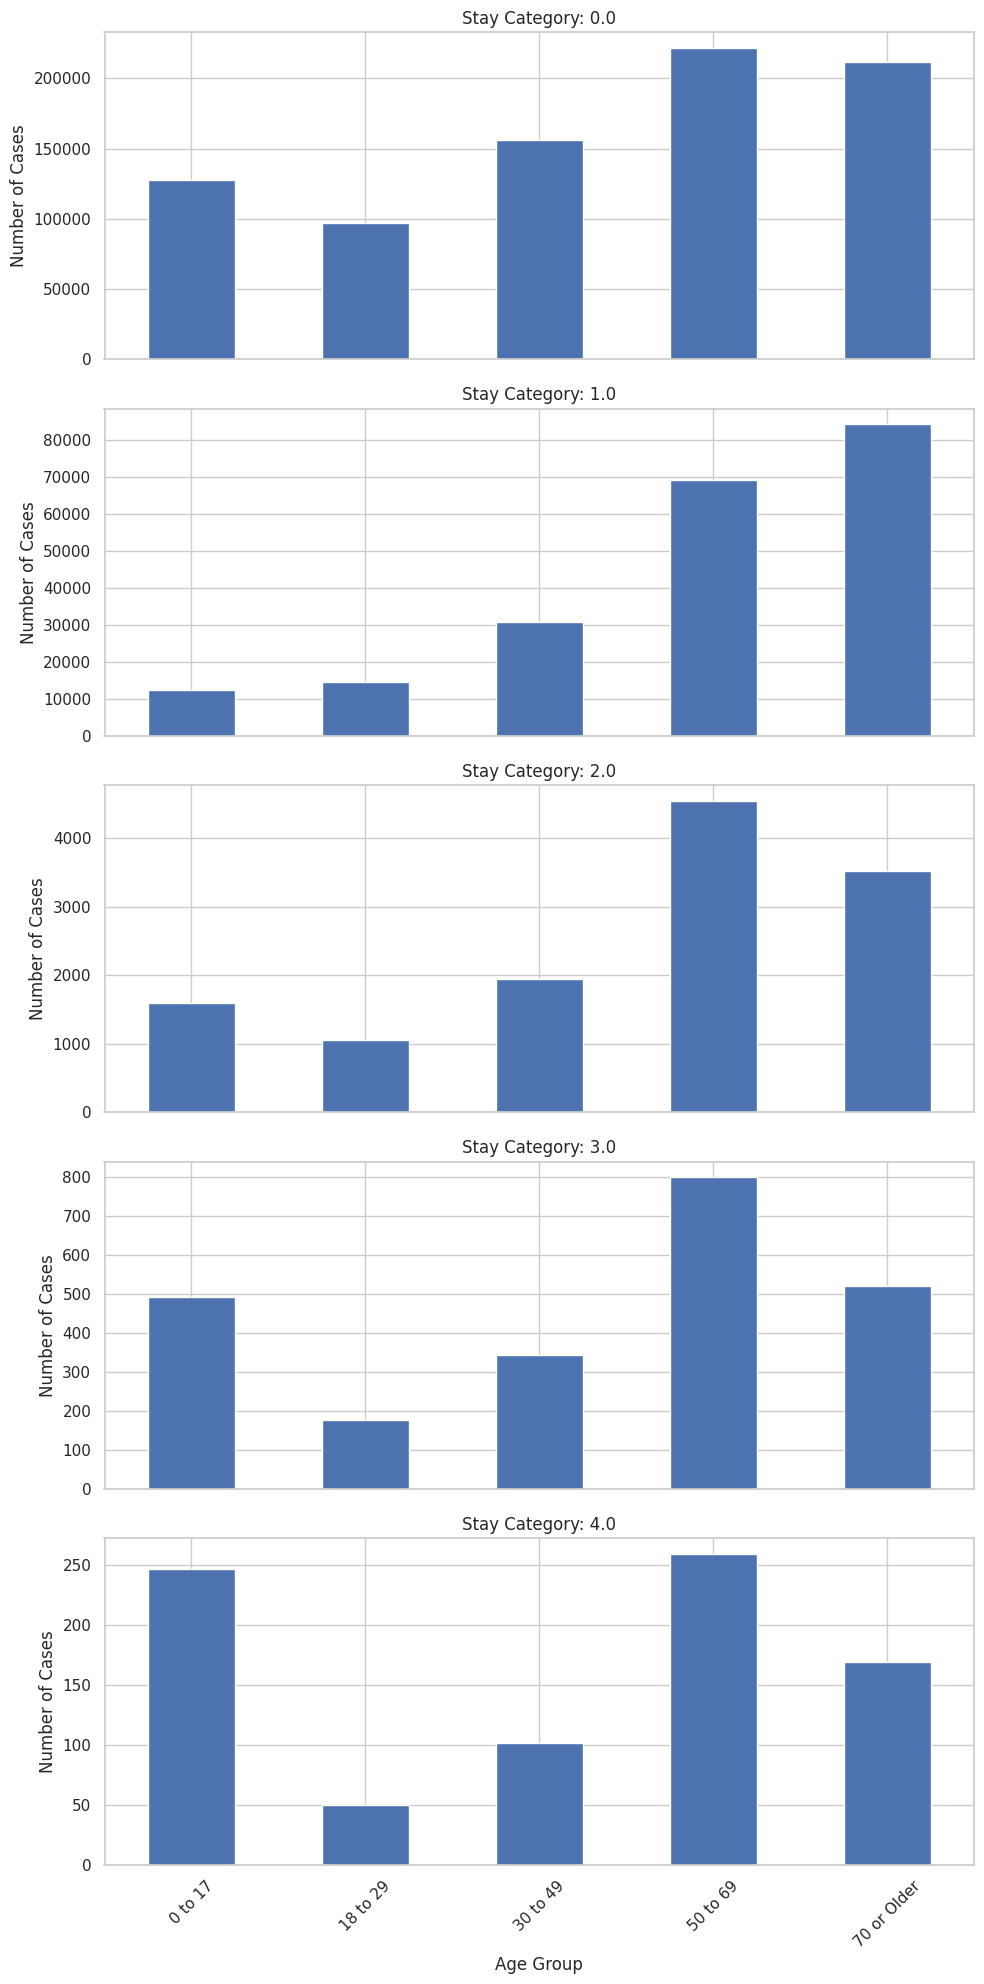

In [43]:
# Creating separate plots for each stay category

# Getting the list of unique stay categories
stay_categories = hospital_data_df_cleaned['Stay_cat_ordinal_data'].unique()
stay_categories.sort()  # Sorting the categories for consistency

# Creating a subplot for each stay category
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 20), sharex=True)

for i, category in enumerate(stay_categories):
    # Filtering data for the specific stay category
    specific_category_distribution = age_group_stay_distribution[category]

    # Plotting
    specific_category_distribution.plot(kind='bar', ax=axes[i], title=f'Stay Category: {category}')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Number of Cases')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


2. **Gender**

In [49]:
# Filtering out 'U' (Unknown) from the Gender column
filtered_data = hospital_data_df_cleaned[hospital_data_df_cleaned['Gender'] != 'U']

# Recreating the crosstab for stay categories and gender (excluding 'U')
gender_stay_distribution = pd.crosstab(filtered_data['Gender'], filtered_data['Stay Category'])

# Printing the table
print(gender_stay_distribution.to_string())


Stay Category  Short Stay  Medium Stay  Long Stay  Very Long Stay  Extended Stay
Gender                                                                          
F                  465030       105771       5795            1058            385
M                  348765       105690       6856            1276            441


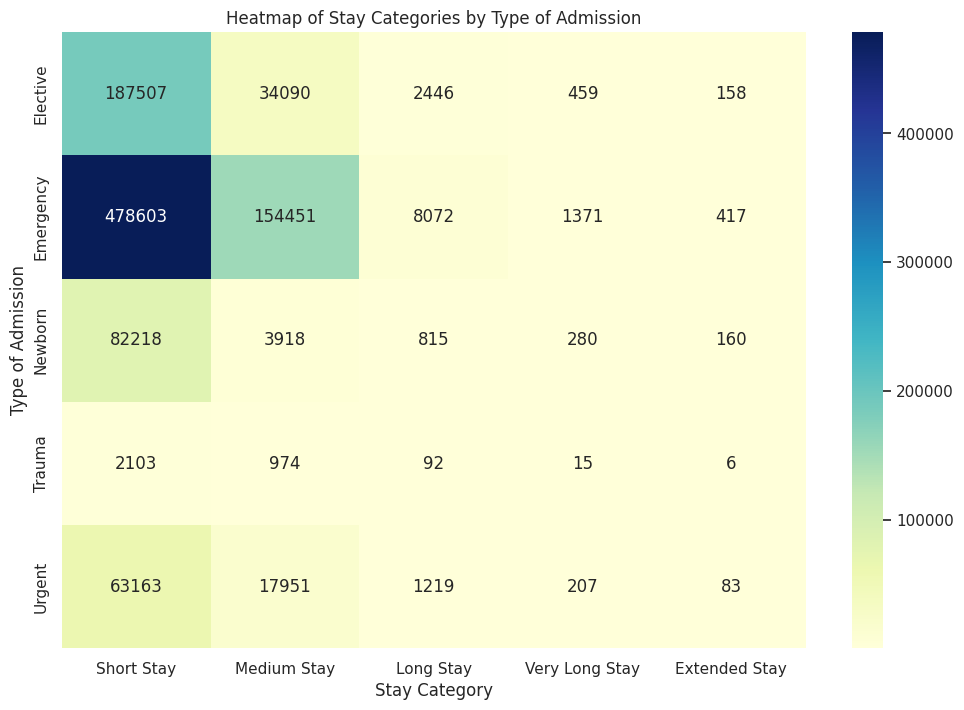

In [59]:
import seaborn as sns
filtered_data = hospital_data_df_cleaned[hospital_data_df_cleaned['Type of Admission'] != 'Not Available']

# Creating a crosstab for type of admission and stay categories
admission_stay_distribution = pd.crosstab(filtered_data['Type of Admission'],
                                          filtered_data['Stay Category'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(admission_stay_distribution, annot=True, fmt="d",cmap="YlGnBu")
plt.title('Heatmap of Stay Categories by Type of Admission')
plt.xlabel('Stay Category')
plt.ylabel('Type of Admission')
plt.show()


3. **APR Severity of Illness Code against Stay Category**

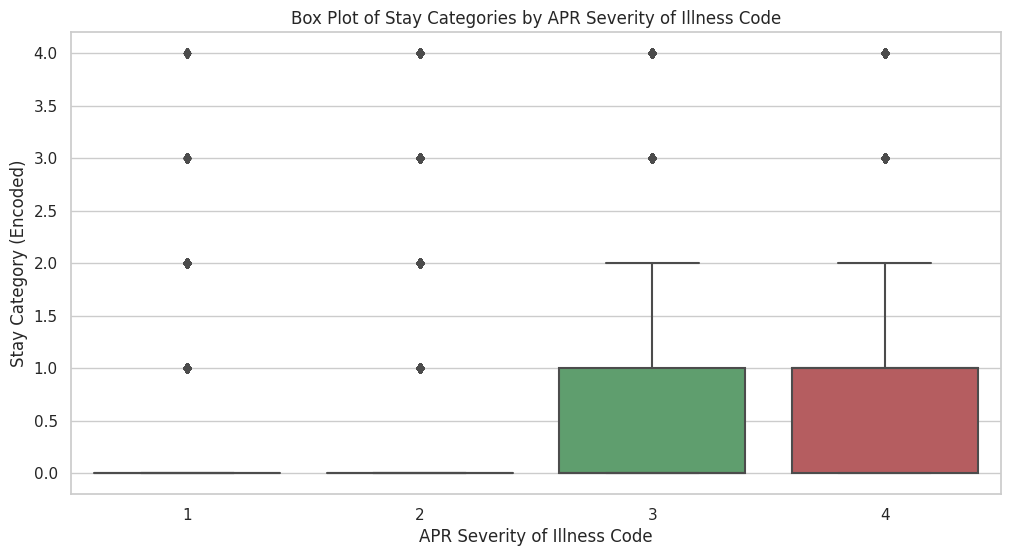

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a box plot for APR Severity of Illness Code against Stay Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='APR Severity of Illness Code', y='Stay_cat_ordinal_data', data=hospital_data_df_cleaned)
plt.title('Box Plot of Stay Categories by APR Severity of Illness Code')
plt.xlabel('APR Severity of Illness Code')
plt.ylabel('Stay Category (Encoded)')
plt.show()


In [66]:
# Grouping the data by APR Severity of Illness Code and getting descriptive statistics for Stay Category
severity_stay_stats = hospital_data_df_cleaned.groupby('APR Severity of Illness Code')['Stay_cat_ordinal_data'].describe()

# Printing the table
print(severity_stay_stats)


                                 count      mean       std  min  25%  50%  \
APR Severity of Illness Code                                                
1                             328831.0  0.077119  0.281317  0.0  0.0  0.0   
2                             403191.0  0.183285  0.419716  0.0  0.0  0.0   
3                             243571.0  0.386975  0.538791  0.0  0.0  0.0   
4                              65478.0  0.817908  0.707252  0.0  0.0  1.0   

                              75%  max  
APR Severity of Illness Code            
1                             0.0  4.0  
2                             0.0  4.0  
3                             1.0  4.0  
4                             1.0  4.0  


4. **violin plot for Race vs. Stay Category**

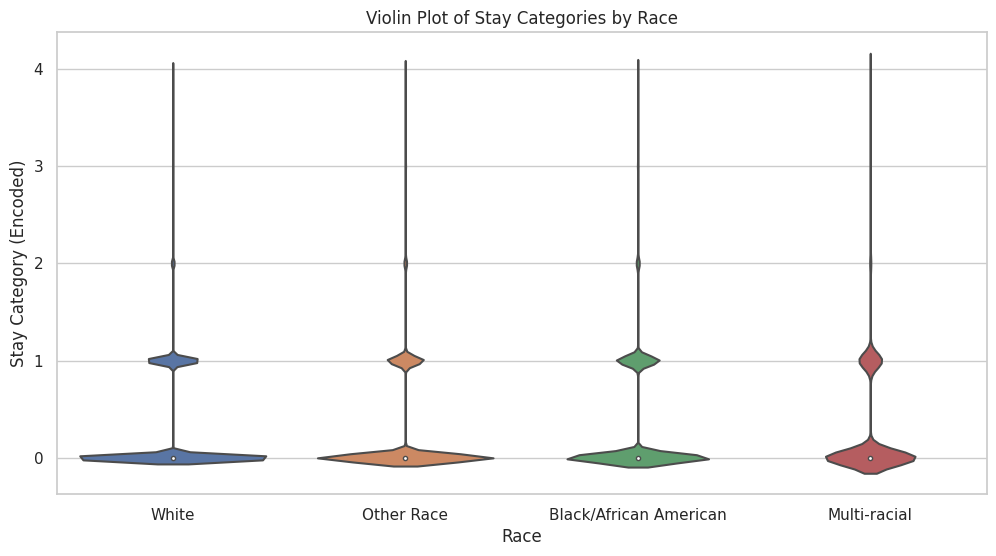

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a violin plot for Race vs. Stay Category
plt.figure(figsize=(12, 6))
sns.violinplot(x='Race', y='Stay_cat_ordinal_data', data=hospital_data_df_cleaned)
plt.title('Violin Plot of Stay Categories by Race')
plt.xlabel('Race')
plt.ylabel('Stay Category (Encoded)')
plt.show()


5. **scatter plot for Total Charges vs. Stay Category**

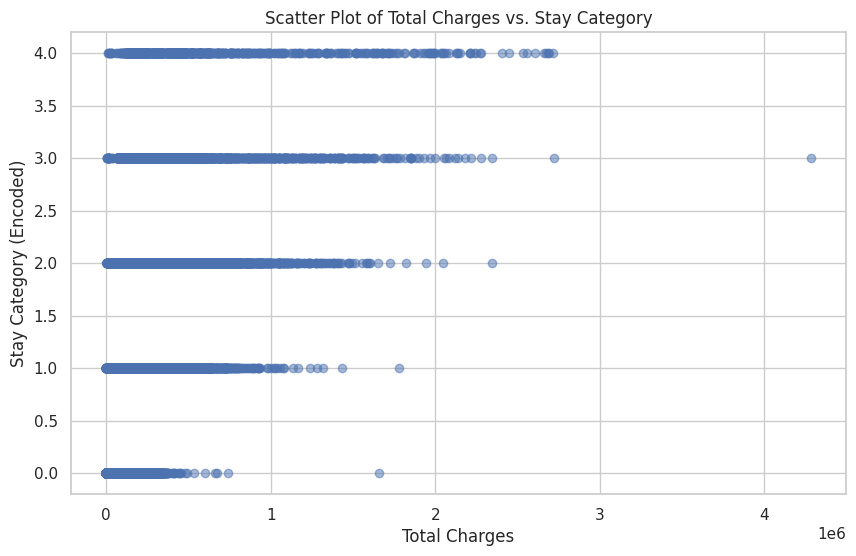

In [73]:
import matplotlib.pyplot as plt

# Creating a scatter plot for Total Charges vs. Stay Category
plt.figure(figsize=(10, 6))
plt.scatter(hospital_data_df_cleaned['Total Charges'], hospital_data_df_cleaned['Stay_cat_ordinal_data'], alpha=0.5)
plt.title('Scatter Plot of Total Charges vs. Stay Category')
plt.xlabel('Total Charges')
plt.ylabel('Stay Category (Encoded)')
plt.show()


6.**donut chart for APR Severity of Illness Description**

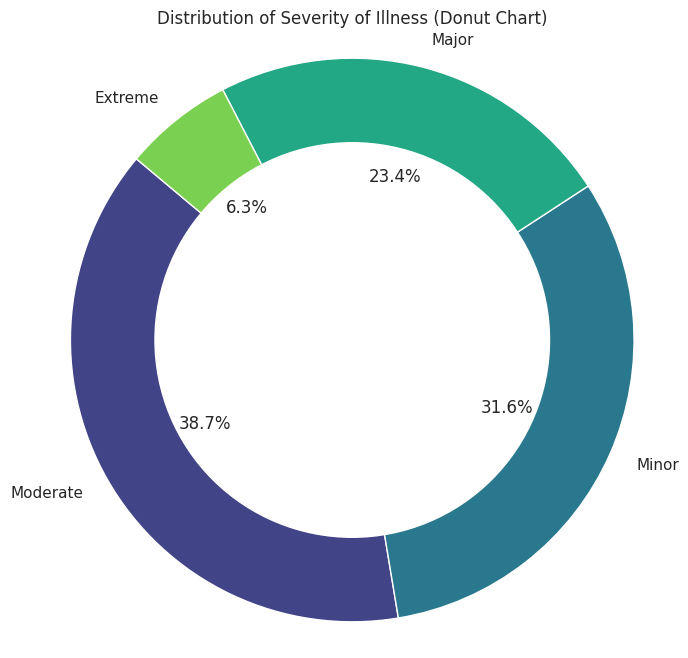

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'hospital_data' is your DataFrame and it has been read correctly
severity_counts = hospital_data_df_cleaned['APR Severity of Illness Description'].value_counts()

# Creating the donut chart
plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(severity_counts)))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center
centre_circle = plt.Circle((0,0),0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Severity of Illness (Donut Chart)')
plt.show()


 7. **relationship between APR Severity of Illness Description and APR Risk of Mortality**

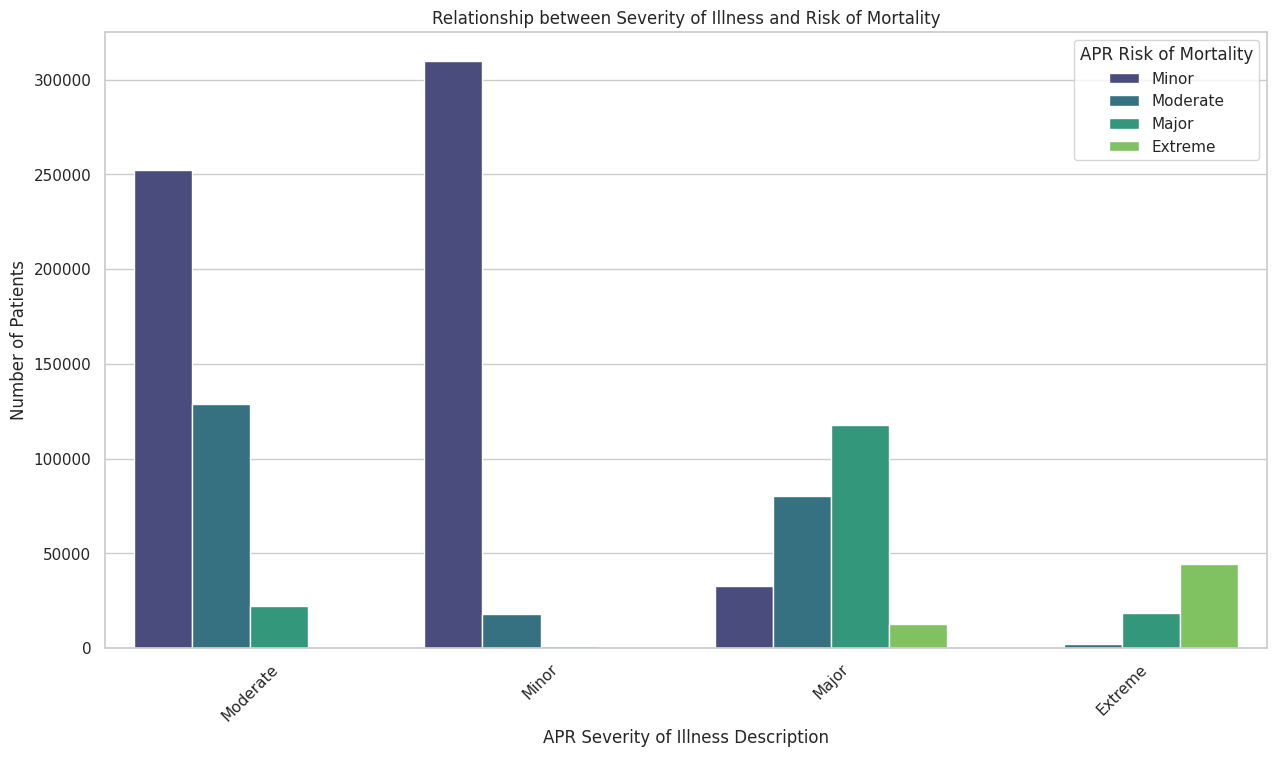

In [76]:
# Grouped bar chart to visualize the relationship between APR Severity of Illness Description and APR Risk of Mortality

plt.figure(figsize=(15, 8))
sns.countplot(data=hospital_data_df_cleaned, x='APR Severity of Illness Description', hue='APR Risk of Mortality', palette='viridis')
plt.title('Relationship between Severity of Illness and Risk of Mortality')
plt.xlabel('APR Severity of Illness Description')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='APR Risk of Mortality', loc='upper right')
plt.show()


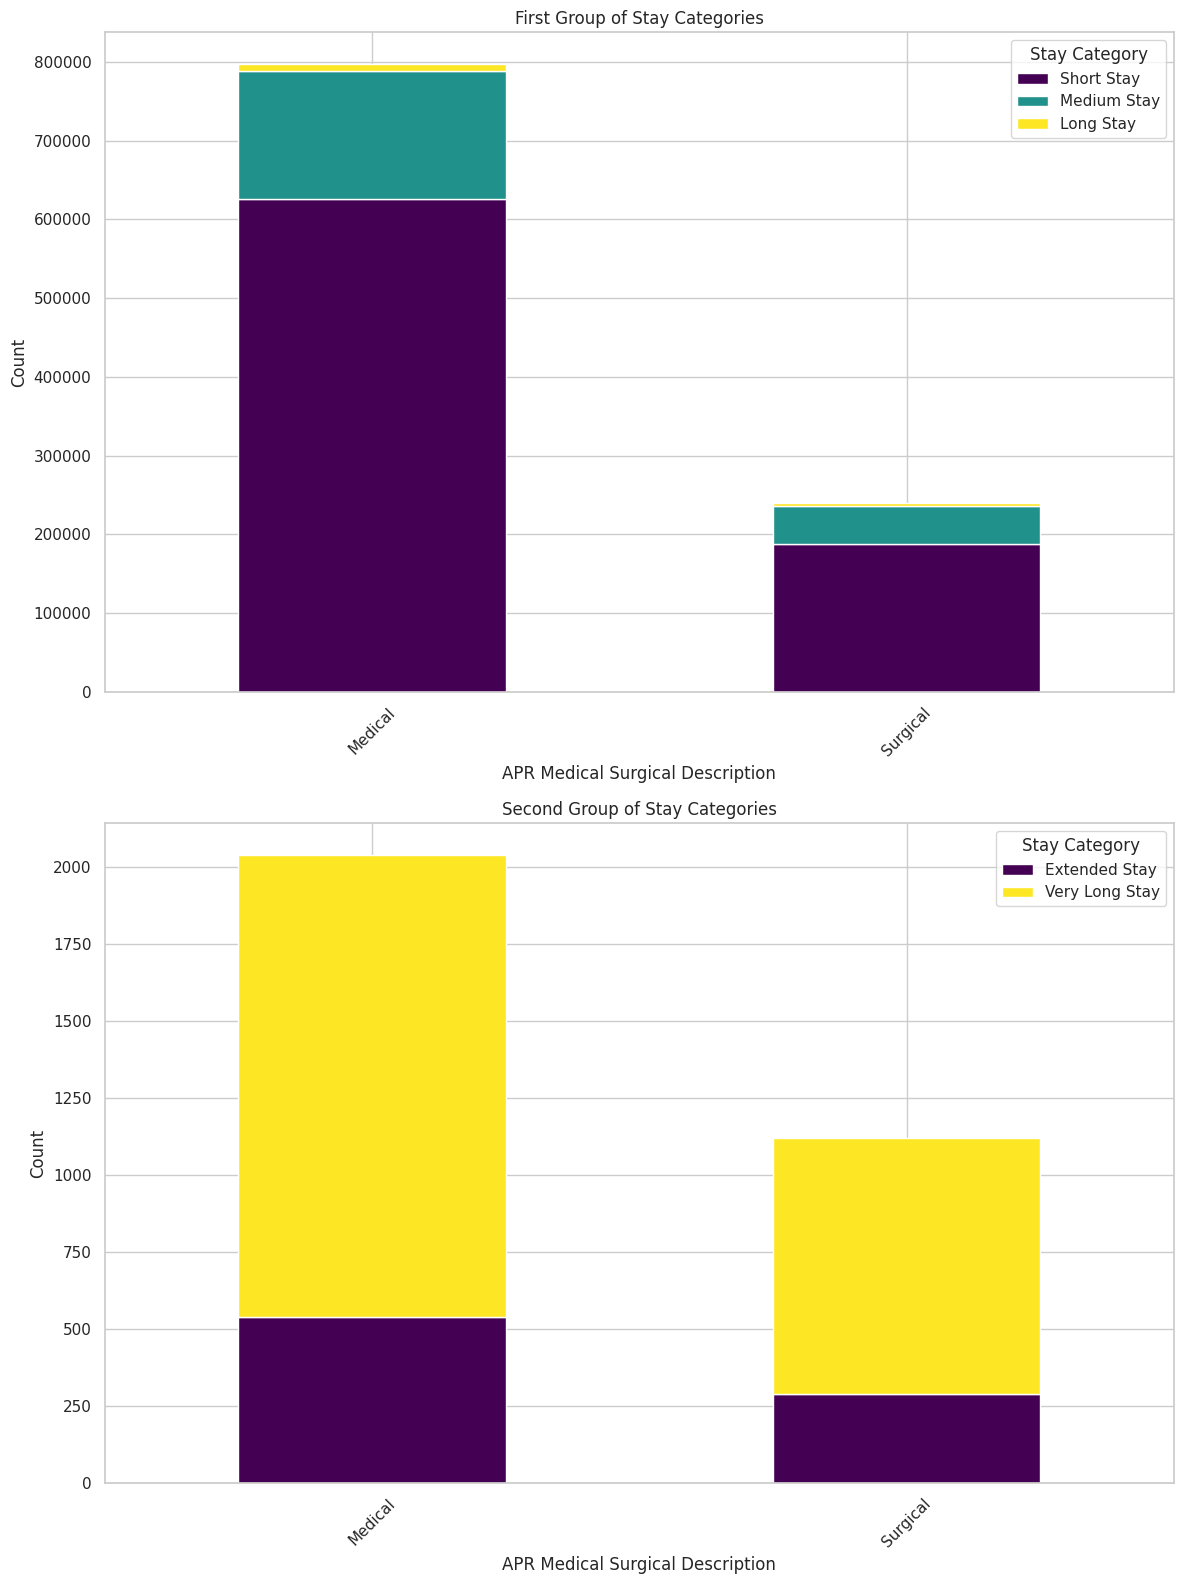

In [91]:
# Check unique categories in 'Stay Category'
unique_categories = hospital_data_df_cleaned['Stay Category'].unique()

# Decide on the splitting of categories for subplots
# Example: Splitting into two groups
first_group = unique_categories[:3]  # First three categories
second_group = unique_categories[3:] # Remaining categories

# Create subplots
fig, axes = plt.subplots(nrows=2, figsize=(12, 16))

# First subplot
first_data = stacked_bar_data[first_group]
first_data.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0])
axes[0].set_title('First Group of Stay Categories')
axes[0].set_xlabel('APR Medical Surgical Description')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot
second_data = stacked_bar_data[second_group]
second_data.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[1])
axes[1].set_title('Second Group of Stay Categories')
axes[1].set_xlabel('APR Medical Surgical Description')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Encoding

In [22]:
hospital_data_df_cleaned

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Stay Category,Stay_cat_ordinal_data
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42,Short Stay,0.0
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78,Short Stay,0.0
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56,Short Stay,0.0
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2.0,...,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25,Short Stay,0.0
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2.0,...,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89,Short Stay,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30.0,...,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05,Long Stay,2.0
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86,Short Stay,0.0
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3.0,...,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02,Short Stay,0.0
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44,Short Stay,0.0


In [23]:

hospital_data_encoded= hospital_data_df_cleaned.copy()



In [24]:
hospital_data_encoded

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Stay Category,Stay_cat_ordinal_data
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5333.90,4818.42,Short Stay,0.0
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Moderate,Medical,Medicare,0,N,Y,4865.99,4588.78,Short Stay,0.0
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,F,White,Not Span/Hispanic,4.0,...,Minor,Medical,Medicare,0,N,Y,5901.54,5559.56,Short Stay,0.0
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,F,White,Not Span/Hispanic,2.0,...,Minor,Medical,Medicare,0,N,Y,3619.08,3567.25,Short Stay,0.0
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,M,White,Not Span/Hispanic,2.0,...,Moderate,Medical,Medicare,0,N,Y,3185.87,3167.89,Short Stay,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,70 or Older,F,Black/African American,Not Span/Hispanic,30.0,...,Extreme,Surgical,Medicare,0,N,Y,115933.16,98318.05,Long Stay,2.0
1048571,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,30 to 49,F,Other Race,Spanish/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,7911.22,8583.86,Short Stay,0.0
1048572,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Unknown,3.0,...,Moderate,Medical,Medicare,0,N,Y,12117.18,12509.02,Short Stay,0.0
1048573,New York City,Bronx,7000001.0,1178.0,Bronx-Lebanon Hospital Center - Concourse Divi...,50 to 69,M,Other Race,Not Span/Hispanic,2.0,...,Minor,Medical,Medicaid,0,N,Y,9821.79,9757.44,Short Stay,0.0


In [25]:

# Label encode categorical columns
label_encoders = {}
for column in categorical_cols:
    if column != 'Stay Category':  # Exclude the 'Stay Category' which is derived from the target
        label_encoder = LabelEncoder()
        hospital_data_encoded[column] = label_encoder.fit_transform(hospital_data_encoded[column].astype(str))
        label_encoders[column] = label_encoder

In [26]:

 hospital_data_encoded.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Stay Category', 'Stay_cat_ordinal_data'],
      dtype='object')

# Model performance :
## 1. **Without balancing Dataset**

### Spliting the data

In [70]:

# Prepare the feature set X and the target y
X = hospital_data_encoded.drop(['Stay_cat_ordinal_data', 'Stay Category', 'Length of Stay'], axis=1)
y = hospital_data_encoded['Stay_cat_ordinal_data']

# Split the data into training and testing sets
X_train_WOB, X_test_WOB, y_train_WOB, y_test_WOB = train_test_split(X, y, test_size=0.3, random_state=42,) #stratify= y)

# Model Training : Without balancing
1. Ordinal logistic regression

In [27]:
pip install mord

  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=160abf76eeb73d56240e490b45e14540a2e23699141036748b29dbe2a90298d0
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [29]:
y_train_WOB = y_train_WOB.astype(int)
y_test_WOB = y_test_WOB.astype(int)


In [30]:
import mord as m
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Ordinal Logistic Regression model
ordinal_logistic = m.LogisticAT(alpha=1.0)  # alpha is the regularization parameter

# Fit the model to the training data
ordinal_logistic.fit(X_train_WOB, y_train_WOB)

# Predict on the test data
y_pred_WOB = ordinal_logistic.predict(X_test_WOB)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_WOB, y_pred_WOB)}")
print("\nClassification Report:")
print(classification_report(y_test_WOB, y_pred_WOB))


Accuracy: 0.7950768757884491

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89    244185
           1       0.67      0.06      0.10     63389
           2       0.33      0.26      0.29      3799
           3       0.17      0.28      0.21       696
           4       0.20      0.48      0.28       253

    accuracy                           0.80    312322
   macro avg       0.44      0.41      0.36    312322
weighted avg       0.77      0.80      0.72    312322



2. **Decision Tree classifier**

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the SMOTE-balanced training data
decision_tree.fit(X_train_WOB, y_train_WOB)

# Predict on the original test data
y_pred_dt_WOB = decision_tree.predict(X_test_WOB)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_WOB, y_pred_dt_WOB)}")
print("\nClassification Report:")
print(classification_report(y_test_WOB, y_pred_dt_WOB))


Accuracy: 0.9102848982780591

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    244185
           1       0.79      0.79      0.79     63389
           2       0.58      0.59      0.59      3799
           3       0.46      0.48      0.47       696
           4       0.51      0.42      0.46       253

    accuracy                           0.91    312322
   macro avg       0.66      0.64      0.65    312322
weighted avg       0.91      0.91      0.91    312322



3. **XGBoost**

In [111]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Fit the model to the training data
xgb_clf.fit(X_train_WOB, y_train_WOB)

# Predict on the test data
y_pred_xgb_WOB = xgb_clf.predict(X_test_WOB)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_WOB, y_pred_xgb_WOB)}")
print("\nClassification Report:")
print(classification_report(y_test_WOB, y_pred_xgb_WOB))


Accuracy: 0.9379902792630682

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    244185
           1       0.85      0.85      0.85     63389
           2       0.71      0.64      0.68      3799
           3       0.61      0.44      0.51       696
           4       0.68      0.38      0.49       253

    accuracy                           0.94    312322
   macro avg       0.76      0.66      0.70    312322
weighted avg       0.94      0.94      0.94    312322



# 3 SMOTE+ Feature selection

### Feature selection


In [27]:
# Print the column names of the DataFrame
print(hospital_data_encoded.columns)


Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Stay Category', 'Stay_cat_ordinal_data'],
      dtype='object')


In [28]:
# Columns to drop as they are unique identifiers
columns_to_drop = [
    'Health Service Area',
    'Hospital County',
    'Operating Certificate Number',
    'Facility Name',
    'Abortion Edit Indicator'
    'Discharge Year',
    'Race',
    'Ethnicity',
]

# Drop the specified columns
hospital_data_encoded = hospital_data_encoded.drop(columns=columns_to_drop, errors='ignore')

# Display the shape of the dataframe after dropping the columns and the first few rows to confirm
hospital_data_encoded.shape

(1041071, 27)

In [29]:
# Print the column names of the DataFrame
print(hospital_data_encoded.columns)

Index(['Facility Id', 'Age Group', 'Gender', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Stay Category', 'Stay_cat_ordinal_data'],
      dtype='object')


In [30]:
# Columns to drop as they are unique identifiers
columns_to_drop = [
    'Discharge Year',
    'Abortion Edit Indicator'
]

# Drop the specified columns
hospital_data_encoded = hospital_data_encoded.drop(columns=columns_to_drop, errors='ignore')

# Display the shape of the dataframe after dropping the columns and the first few rows to confirm
hospital_data_encoded.shape

(1041071, 25)

In [31]:
hospital_data_encoded.dtypes

Facility Id                             float64
Age Group                                 int32
Gender                                    int32
Length of Stay                            int32
Type of Admission                         int32
Patient Disposition                       int32
CCS Diagnosis Code                        int64
CCS Diagnosis Description                 int32
CCS Procedure Code                        int64
CCS Procedure Description                 int32
APR DRG Code                              int64
APR DRG Description                       int32
APR MDC Code                              int64
APR MDC Description                       int32
APR Severity of Illness Code              int64
APR Severity of Illness Description       int32
APR Risk of Mortality                     int32
APR Medical Surgical Description          int32
Payment Typology 1                        int32
Birth Weight                              int64
Emergency Department Indicator          

# Feature selection


In [32]:

# Prepare the feature set X and the target y
X = hospital_data_encoded.drop(['Stay_cat_ordinal_data', 'Stay Category', 'Length of Stay'], axis=1)
y = hospital_data_encoded['Stay_cat_ordinal_data']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the classifier on the training data
rf_clf.fit(X_train, y_train)

# Get the feature importances
importances = rf_clf.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print the feature importances
for idx in sorted_indices:
    print(f"{X_train.columns[idx]}: {importances[idx]}")

Total Costs: 0.2866404997772766
Total Charges: 0.18210947309968126
Facility Id: 0.07279313774188433
APR DRG Code: 0.051188081935043546
CCS Diagnosis Code: 0.0415617691243888
APR Severity of Illness Description: 0.034257864737246055
APR Severity of Illness Code: 0.033767309288200056
APR MDC Code: 0.031158833192755798
Patient Disposition: 0.03101286834519812
CCS Procedure Code: 0.027994581909829525
APR DRG Description: 0.027263066120199034
APR Risk of Mortality: 0.02400285916321976
CCS Procedure Description: 0.023452293179963987
CCS Diagnosis Description: 0.022407374397848658
APR MDC Description: 0.019103306167934833
APR Medical Surgical Description: 0.017718674785651266
Type of Admission: 0.017252410216918784
Age Group: 0.016253777227608332
Payment Typology 1: 0.01575053535785595
Emergency Department Indicator: 0.012959616839265638
Gender: 0.009062249174238856
Birth Weight: 0.002289418217790694


In [33]:
# Features to drop based on importance scores (assuming the cutoff threshold is 0.01 for importance)
features_to_drop_low_importance = [
    feature for feature, importance in zip(
        hospital_data_encoded.columns,
        rf_clf.feature_importances_
    ) if importance < 0.01
]

# Drop low importance features from the dataset
hospital_data_df_reduced = hospital_data_encoded.drop(columns=features_to_drop_low_importance, errors='ignore')

# Display the shape of the new dataframe and the first few rows to confirm the drop
hospital_data_df_reduced.shape


(1041071, 23)

In [34]:
# Print the column names of the DataFrame
print(hospital_data_df_reduced.columns)

Index(['Facility Id', 'Age Group', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs',
       'Stay Category', 'Stay_cat_ordinal_data'],
      dtype='object')


In [35]:
hospital_data_df_reduced.dtypes

Facility Id                             float64
Age Group                                 int32
Length of Stay                            int32
Type of Admission                         int32
Patient Disposition                       int32
CCS Diagnosis Code                        int64
CCS Diagnosis Description                 int32
CCS Procedure Code                        int64
CCS Procedure Description                 int32
APR DRG Code                              int64
APR DRG Description                       int32
APR MDC Code                              int64
APR MDC Description                       int32
APR Severity of Illness Code              int64
APR Severity of Illness Description       int32
APR Risk of Mortality                     int32
APR Medical Surgical Description          int32
Birth Weight                              int64
Emergency Department Indicator            int32
Total Charges                           float64
Total Costs                             

# SMOTE

## Splitting dataset

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the feature set X and the target y
X = hospital_data_df_reduced.drop(['Stay_cat_ordinal_data', 'Stay Category', 'Length of Stay'], axis=1)
y = hospital_data_df_reduced['Stay_cat_ordinal_data']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
balanced_target_distribution = pd.Series(y_train_smote).value_counts(normalize=True)

balanced_target_distribution


0.0    0.2
1.0    0.2
2.0    0.2
4.0    0.2
3.0    0.2
Name: Stay_cat_ordinal_data, dtype: float64

In [40]:
y_train_smote= y_train_smote.astype(int)

In [41]:

import mord as m
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Ordinal Logistic Regression model
ordinal_logistic = m.LogisticAT(alpha=1.0)  # alpha is the regularization parameter

# Fit the model to the training data
ordinal_logistic.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred = ordinal_logistic.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.5797702371270675

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.74    244185
         1.0       0.25      0.38      0.30     63389
         2.0       0.06      0.57      0.10      3799
         3.0       0.17      0.49      0.25       696
         4.0       0.22      0.44      0.29       253

    accuracy                           0.58    312322
   macro avg       0.31      0.50      0.34    312322
weighted avg       0.74      0.58      0.64    312322



In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the SMOTE-balanced training data
decision_tree.fit(X_train_smote, y_train_smote)

# Predict on the original test data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9002599880892156

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94    244185
         1.0       0.75      0.78      0.77     63389
         2.0       0.54      0.58      0.56      3799
         3.0       0.44      0.50      0.47       696
         4.0       0.43      0.42      0.42       253

    accuracy                           0.90    312322
   macro avg       0.62      0.64      0.63    312322
weighted avg       0.90      0.90      0.90    312322



In [43]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Fit the model to the training data
xgb_clf.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.9232074589686285

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96    244185
         1.0       0.81      0.82      0.82     63389
         2.0       0.53      0.73      0.61      3799
         3.0       0.45      0.60      0.51       696
         4.0       0.44      0.58      0.50       253

    accuracy                           0.92    312322
   macro avg       0.64      0.74      0.68    312322
weighted avg       0.93      0.92      0.92    312322



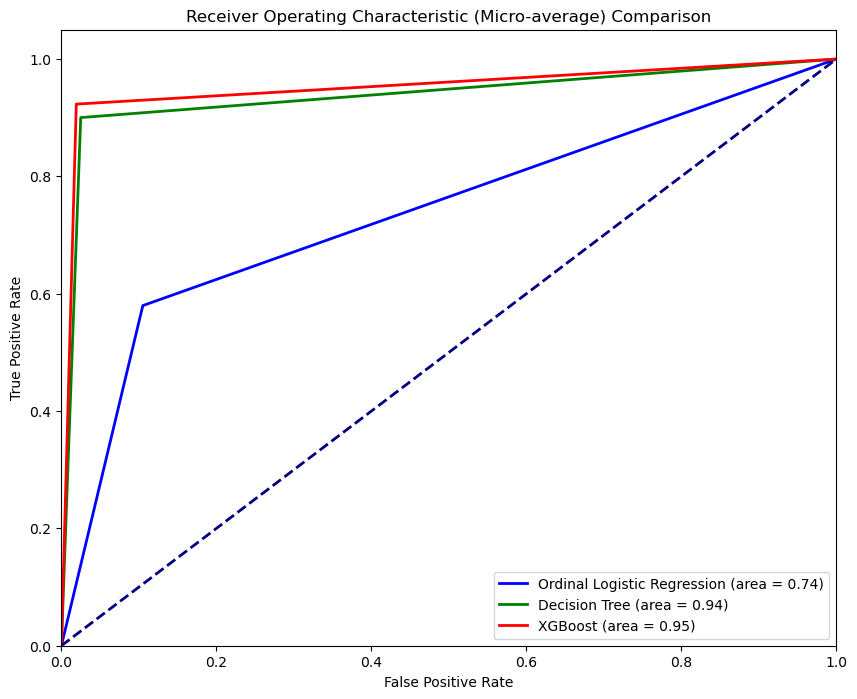

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test is your test labels and y_pred_ordinal, y_pred_dt, y_pred_xgb are predictions from your models
# Binarize the output labels for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_pred_ordinal_binarized = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])
y_pred_dt_binarized = label_binarize(y_pred_dt, classes=[0, 1, 2, 3, 4])
y_pred_xgb_binarized = label_binarize(y_pred_xgb, classes=[0, 1, 2, 3, 4])

# Function to calculate ROC curve and ROC area
def compute_roc_auc(y_test_binarized, y_pred_binarized):
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_pred_binarized.ravel())
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Calculate ROC curve and ROC area for each model
fpr_ordinal, tpr_ordinal, roc_auc_ordinal = compute_roc_auc(y_test_binarized, y_pred_ordinal_binarized)
fpr_dt, tpr_dt, roc_auc_dt = compute_roc_auc(y_test_binarized, y_pred_dt_binarized)
fpr_xgb, tpr_xgb, roc_auc_xgb = compute_roc_auc(y_test_binarized, y_pred_xgb_binarized)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_ordinal, tpr_ordinal, color='blue', lw=2, label='Ordinal Logistic Regression (area = %0.2f)' % roc_auc_ordinal)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Micro-average) Comparison')
plt.legend(loc="lower right")
plt.show()


# Hyperparameter tunning with XGBoost

In [97]:


# Define the parameter grid
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_depth': [9, 11, 13],
    'gamma': [0.2, 0.3, 0.4],
    'subsample': [0.7, 0.6, 0.8],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Initialize RandomizedSearchCV
# Choose 'f1_weighted' or 'f1_macro' based on your preference
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_grid, n_iter=50, scoring='f1_macro', n_jobs=-1, cv=3, random_state=42)

# Fit the model
random_search.fit(X_train_smote, y_train_smote)

# Best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best F1 score found: ", random_search.best_score_)


Best parameters found:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 13, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best F1 score found:  0.9595978887787879


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Use the best estimator
best_xgb = random_search.best_estimator_

# Predict on the test data
y_pred_best = best_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Accuracy: 0.9414066252137218
Precision: 0.9416067286008729
Recall: 0.9414066252137218
F1 Score: 0.941498296575658
Confusion Matrix:
[[235983   8172     23      4      3]
 [  7546  54889    923     25      6]
 [     1    990   2621    167     20]
 [     0     24    216    391     65]
 [     0      3     40     72    138]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97    244185
         1.0       0.86      0.87      0.86     63389
         2.0       0.69      0.69      0.69      3799
         3.0       0.59      0.56      0.58       696
         4.0       0.59      0.55      0.57       253

    accuracy                           0.94    312322
   macro avg       0.74      0.73      0.73    312322
weighted avg       0.94      0.94      0.94    312322



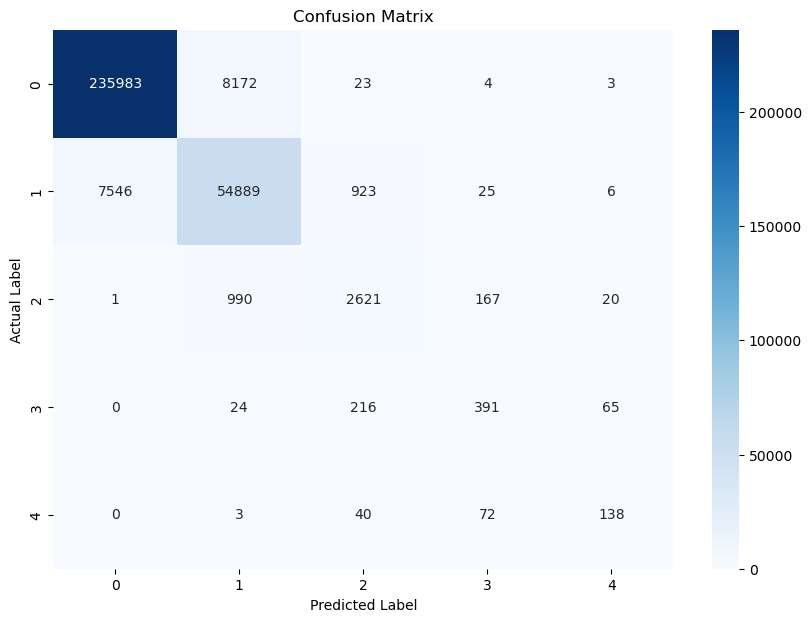

In [111]:

# Calculating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
